<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/lstm_stock_predict_trading_ibm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import tensorflow as tf
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 7.8MB/s 
     |████████████████████████████████| 266kB 39.4MB/s 
     |████████████████████████████████| 153kB 20.7MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=6abee25f6054653d0b967741e642b2e75a40b9adb5afc26db502bcad5bbb7e6a
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=8f2d77584f56475ff6b3fc3e00025a2a290e0cc0de3b9298d481c848c6e63a42
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
api_key = '5LLGMLRK81AS4OEH'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
# ts = TimeSeries(key=api_key,output_format='pandas')
# df, meta_data = ts.get_daily(symbol='IBM', outputsize='compact')
# print(df)

In [ ]:
# cc = ForeignExchange(key = api_key, output_format = 'pandas')
# df, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# print(df)

In [ ]:
# Get the stock quote
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2000-01-25', end = '2020-8-15')

In [ ]:
# df = df[::-1]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-25,39.265099,37.674599,38.393200,37.674599,3684803.0,12.184047
2000-01-27,36.984699,34.666000,36.409801,34.666000,9020094.0,11.211061
2000-01-28,34.876801,32.261002,32.768799,33.573700,13942904.0,10.857810
2000-01-31,36.160702,32.586800,32.797600,34.436001,14875954.0,11.136679
2000-02-01,35.432499,32.979599,34.474300,33.592800,6294485.0,10.863985
...,...,...,...,...,...,...
2020-08-10,124.699997,119.699997,119.949997,123.849998,71093810.0,123.849998
2020-08-11,125.800003,121.400002,125.000000,122.300003,50224665.0,122.300003
2020-08-12,126.400002,120.599998,121.000000,125.349998,50713617.0,125.349998


In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-25,39.265099,37.674599,38.393200,37.674599,3684803.0,12.184047
2000-01-27,36.984699,34.666000,36.409801,34.666000,9020094.0,11.211061
2000-01-28,34.876801,32.261002,32.768799,33.573700,13942904.0,10.857810
2000-01-31,36.160702,32.586800,32.797600,34.436001,14875954.0,11.136679
2000-02-01,35.432499,32.979599,34.474300,33.592800,6294485.0,10.863985
...,...,...,...,...,...,...
2020-08-10,124.699997,119.699997,119.949997,123.849998,71093810.0,123.849998
2020-08-11,125.800003,121.400002,125.000000,122.300003,50224665.0,122.300003
2020-08-12,126.400002,120.599998,121.000000,125.349998,50713617.0,125.349998


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
# sum_column = (df["2. high"] + df["3. low"])/2
# df["avg"] = sum_column

In [ ]:
df.tail(30)

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2020-07-06,109.900002,104.500000,105.000000,109.000000,91970198.0,109.000000,2020-07-06
2020-07-07,112.599998,108.050003,109.800003,109.050003,85835716.0,109.050003,2020-07-07
2020-07-08,110.849998,104.199997,109.500000,105.349998,55887256.0,105.349998,2020-07-08
2020-07-09,108.949997,104.650002,106.300003,106.949997,54492650.0,106.949997,2020-07-09
2020-07-10,108.599998,105.400002,106.699997,107.599998,64694173.0,107.599998,2020-07-10
2020-07-13,112.099998,106.849998,108.849998,108.000000,81893001.0,108.000000,2020-07-13
2020-07-14,107.550003,104.099998,106.900002,105.150002,46924623.0,105.150002,2020-07-14
2020-07-15,106.800003,102.500000,106.800003,103.199997,49687046.0,103.199997,2020-07-15
2020-07-16,103.949997,100.599998,103.949997,102.949997,44333785.0,102.949997,2020-07-16


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(5080, 7)

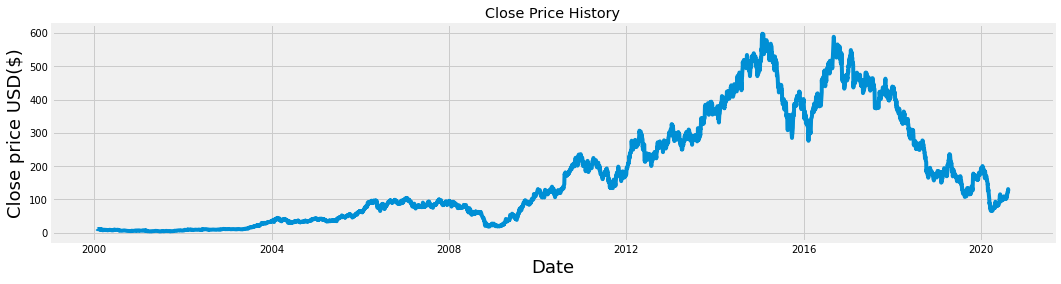

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['Adj Close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['Adj Close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.999)

training_data_len

5075

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01373582],
       [0.01209742],
       [0.01150259],
       ...,
       [0.20429419],
       [0.21406071],
       [0.20303128]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.01373582, 0.01209742, 0.01150259, 0.01197217, 0.01151299,
       0.01201394, 0.01172695, 0.01189392, 0.01177389, 0.01206612,
       0.01238441, 0.01211828, 0.01093384, 0.00968677, 0.01052165,
       0.01042248, 0.01057905, 0.00931107, 0.01059991, 0.01199303,
       0.01075642, 0.01098601, 0.0123061 , 0.01211305, 0.01060513,
       0.00966591, 0.00853886, 0.00731788, 0.00769881, 0.00700481,
       0.00652476, 0.00758919, 0.00672305, 0.00577859, 0.00678567,
       0.00732834, 0.00839276, 0.00882585, 0.00851278, 0.00743268,
       0.00733351, 0.00734396, 0.00715092, 0.00729703, 0.00644651,
       0.00744308, 0.00811099, 0.00692132, 0.00715614, 0.00665002,
       0.00770398, 0.00779269, 0.00761527, 0.00733351, 0.00668133,
       0.0069735 , 0.0059143 , 0.00621692, 0.00602387, 0.00633694])]
[0.0065195395726124275]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [ ]:
x_train.shape

(5015, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()

model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mse',)

In [ ]:
history = model.fit(x_train,y_train,batch_size=1, epochs = 10,)

Epoch 1/10
5015/5015 [==============================] - 222s 44ms/step - loss: 0.0041
Epoch 2/10
5015/5015 [==============================] - 211s 42ms/step - loss: 0.0024
Epoch 3/10
5015/5015 [==============================] - 211s 42ms/step - loss: 0.0019
Epoch 4/10
5015/5015 [==============================] - 212s 42ms/step - loss: 0.0018
Epoch 5/10
5015/5015 [==============================] - 210s 42ms/step - loss: 0.0017
Epoch 6/10
5015/5015 [==============================] - 211s 42ms/step - loss: 0.0015
Epoch 7/10
5015/5015 [==============================] - 213s 42ms/step - loss: 0.0014
Epoch 8/10
5015/5015 [==============================] - 211s 42ms/step - loss: 0.0013
Epoch 9/10
5015/5015 [==============================] - 212s 42ms/step - loss: 0.0013
Epoch 10/10
5015/5015 [==============================] - 217s 43ms/step - loss: 0.0012


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = x_test[:1]

In [ ]:
x_test

[array([0.13525493, 0.12902457, 0.13096104, 0.13373944, 0.13483396,
        0.13264492, 0.13315008, 0.13559172, 0.13971723, 0.13971723,
        0.14401114, 0.15571413, 0.15950287, 0.1590819 , 0.17970948,
        0.18762373, 0.1808882 , 0.18080401, 0.17196362, 0.17053232,
        0.16244967, 0.15276733, 0.15386186, 0.15546155, 0.16581744,
        0.16607002, 0.16901682, 0.16969038, 0.16800649, 0.16396517,
        0.16068159, 0.15866093, 0.16287064, 0.16421775, 0.16741712,
        0.17676269, 0.17684689, 0.17061651, 0.17331072, 0.17440525,
        0.1750788 , 0.17027973, 0.16699615, 0.16657518, 0.17238459,
        0.17011135, 0.17583654, 0.17027973, 0.17179523, 0.16792229,
        0.16447033, 0.17246878, 0.17129006, 0.16775391, 0.16943779,
        0.18358242, 0.1808882 , 0.18753955, 0.18989699, 0.19376992])]

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test.shape

(1, 60)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(1, 60, 1)

In [ ]:
# x_test = range(10)
# x_test = x_test.ravel()
# print(x_test)
# x_test = x_test[0][1:]
# x_test
# pred = 23
# x_test = np.append(x_test[0][1:],25)
# x_test
# x_test = np.reshape(x_test,(-1,60))
# x_test
# x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
# x_test.shape

In [ ]:
predictions = []
for i in range(60):
  # x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  # print("1")
  x_next = model.predict(x_test)
  predictions.append(x_next[0])
  # x_test = x_test.ravel()
  x_test = np.append(x_test[0][1:],x_next)
  x_test = np.reshape(x_test,(-1,60))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = np.array(predictions)

In [ ]:
# Get model prediction price value
# predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[118.87472],
       [120.56397],
       [122.17152],
       [123.88943],
       [125.71848],
       [127.60041],
       [129.49431],
       [131.38501],
       [133.27032],
       [135.1508 ],
       [137.02611],
       [138.89464],
       [140.75424],
       [142.60254],
       [144.43706],
       [146.25523],
       [148.0543 ],
       [149.83145],
       [151.58372],
       [153.30817],
       [155.00186],
       [156.66191],
       [158.28561],
       [159.87036],
       [161.41374],
       [162.91359],
       [164.36794],
       [165.77505],
       [167.13348],
       [168.44203],
       [169.6997 ],
       [170.90585],
       [172.06001],
       [173.162  ],
       [174.21191],
       [175.21004],
       [176.15689],
       [177.05318],
       [177.89978],
       [178.69781],
       [179.44847],
       [180.15306],
       [180.81311],
       [181.43013],
       [182.00578],
       [182.54176],
       [183.03983],
       [183.50174],
       [183.92929],
       [184.32431],


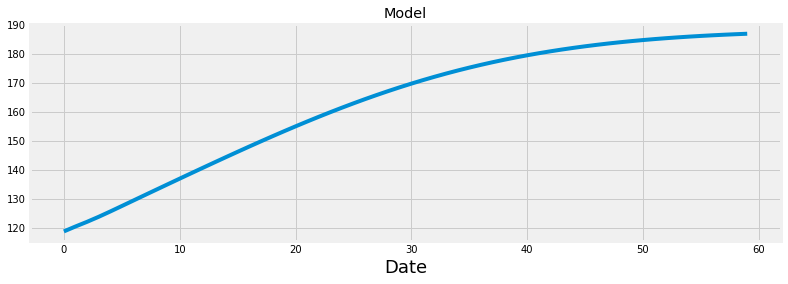

In [ ]:
valid = data[training_data_len:] 
valid = valid[-60:]
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.plot(predictions)

In [ ]:
# rmse = np.sqrt( np.mean(predictions - y_test)**2)
# rmse

In [ ]:
# # PLot the data
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['Predictions'] = predictions
# # Visualize the data
# plt.figure(figsize=(12,4))
# plt.title("Model")
# plt.xlabel('Date', fontsize = 18)
# plt.ylabel('Close Price USD($) ', fontsize=18)
# # plt.plot(train['4.close'])
# plt.plot(valid[['Adj Close', 'Predictions']])
# plt.legend(['Close','Val','Predictions'],loc = 'lower right')
# plt.tight_layout()
# plt.show()

In [ ]:
# valid.sum(axis=0)

In [ ]:
valid

,Adj Close
Date,
2020-08-10,123.849998
2020-08-11,122.300003
2020-08-12,125.349998
2020-08-13,131.149994
2020-08-14,124.599998


In [ ]:
# # Get the quote
# # apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
# apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# apple_quote = apple_quote[::-1]
# sum_column = (apple_quote["2. high"] + apple_quote["3. low"])/2
# apple_quote["average"] = sum_column
# # Create new dataframe
# new_df = apple_quote.filter(items=['average'])
# # Get the last 60 days closing price and convert to numpy array
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)

# # Convert the X_test dataset to numpy array
# X_test = np.array(X_test)
# # Reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# # Get Predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# comp = (new_df['average'][-1])
# # comp = float("{:.5f}".format(comp))
# # pred_price = float(pred_price)
# # pred_price = float("{:.4f}".format(pred_price))
# print(pred_price)
# print(comp)
# if pred_price > comp:
#   print("green")
# elif pred_price < comp:
#   print("red")
# else:
#   print ("Dont buy or sell")

In [ ]:
# new, meta_data = cc.get_currency_exchange_intraday(from_symbol='AUD', to_symbol='JPY',interval='5min',outputsize='full')
# new = new[::-1]
# print(new.tail(10))

In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,60)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,60,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)